In [ ]:
from pathlib import Path
import os

image_dirs = [
    Path('../dataset/images/train/grayscale_wholeImage'),
    Path('../dataset/images/test/grayscale_wholeImage'),
]

for image_dir in image_dirs:
    if not image_dir.exists():
        continue

    for file in image_dir.iterdir():
        if not file.name.endswith('png'):
            try:
                os.remove(file) 
                print(f'Removed: {file}')
            except Exception as e:
                print(f'Error removing {file}: {e}')


In [43]:
import os

# Paths
base_input_labels = "../dataset/labels"  
base_output_labels = "dataset_yolo/labels"

# Image dimensions (adjust if needed)
IMAGE_WIDTH = 640
IMAGE_HEIGHT = 480

def convert_bbox_to_yolo(x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2.0 / img_width
    y_center = (y_min + y_max) / 2.0 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return x_center, y_center, width, height

def process_split(split):
    input_label_dir = os.path.join(base_input_labels, split, "boundingBoxes_wholeImage")
    output_label_dir = os.path.join(base_output_labels, split, "grayscale_wholeImage")
    os.makedirs(output_label_dir, exist_ok=True)

    if not os.path.exists(input_label_dir):
        print(f"[Warning] Input label directory does not exist: {input_label_dir}")
        return

    for filename in os.listdir(input_label_dir):
        if not filename.endswith(".txt"):
            continue

        input_path = os.path.join(input_label_dir, filename)
        output_path = os.path.join(output_label_dir, filename)

        with open(input_path, 'r') as infile, open(output_path, 'w') as outfile:
            for line in infile:
                cls, x_min, y_min, x_max, y_max = map(int, line.strip().split(','))
                x, y, w, h = convert_bbox_to_yolo(x_min, y_min, x_max, y_max, IMAGE_WIDTH, IMAGE_HEIGHT)
                outfile.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

        print(f"[✓] Converted: {filename}")

# Process both train and test
for split in ['train', 'test']:
    process_split(split)


[✓] Converted: aclass_train_imageID_1708_GT_4_6_2.txt
[✓] Converted: aclass_train_imageID_859_GT_5_0_0.txt
[✓] Converted: aclass_train_imageID_1524_GT_6_6_0.txt
[✓] Converted: aclass_train_imageID_1212_GT_1_0_3.txt
[✓] Converted: aclass_train_imageID_463_GT_3_0_3.txt
[✓] Converted: aclass_train_imageID_137_GT_3_0_6.txt
[✓] Converted: aclass_train_imageID_898_GT_2_0_0.txt
[✓] Converted: aclass_train_imageID_572_GT_4_0_3.txt
[✓] Converted: aclass_train_imageID_1196_GT_2_0_2.txt
[✓] Converted: aclass_train_imageID_1915_GT_1_0_3.txt
[✓] Converted: aclass_train_imageID_406_GT_6_1_3.txt
[✓] Converted: aclass_train_imageID_1418_GT_5_2_0.txt
[✓] Converted: aclass_train_imageID_280_GT_0_5_0.txt
[✓] Converted: aclass_train_imageID_1245_GT_5_0_3.txt
[✓] Converted: aclass_train_imageID_1154_GT_5_4_4.txt
[✓] Converted: aclass_train_imageID_803_GT_3_0_5.txt
[✓] Converted: aclass_train_imageID_1917_GT_2_6_0.txt
[✓] Converted: aclass_train_imageID_1162_GT_5_4_3.txt
[✓] Converted: aclass_train_imageID_

In [44]:
from pathlib import Path

# Paths to label directories
label_dirs = [
    Path('dataset_yolo/labels/train/grayscale_wholeImage'),
    Path('dataset_yolo/labels/test/grayscale_wholeImage'),
]

for label_dir in label_dirs:
    if not label_dir.exists():
        continue

    for file in label_dir.glob('*.txt'):
        lines = []
        changed = False
        with open(file) as f:
            for line in f:
                parts = line.strip().split()
                if parts:
                    cls = int(parts[0])
                    new_cls = cls - 1
                    if new_cls < 0:
                        print(f'⚠️ Skipping line in {file} with class {cls} → would become negative')
                        continue
                    if new_cls != cls:
                        changed = True
                    lines.append(' '.join([str(new_cls)] + parts[1:]))
        if changed:
            with open(file, 'w') as f:
                f.write('\n'.join(lines) + '\n')
            print(f'✔️ Shifted labels in {file}')


✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_1708_GT_4_6_2.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_859_GT_5_0_0.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_1524_GT_6_6_0.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_1212_GT_1_0_3.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_463_GT_3_0_3.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_137_GT_3_0_6.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_898_GT_2_0_0.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_572_GT_4_0_3.txt
✔️ Shifted labels in dataset_yolo/labels/train/grayscale_wholeImage/aclass_train_imageID_1196_GT_2_0_2.txt
✔️ Shifted labels in dataset_yolo/labels/t

In [45]:
from pathlib import Path

image_dirs = [
    Path('dataset_yolo/images/train/grayscale_wholeImage'),
    Path('dataset_yolo/images/test/grayscale_wholeImage'),
]

for image_dir in image_dirs:
    if not image_dir.exists():
        continue

    for file in image_dir.iterdir():
        if not file.name.endswith('png'):
            try:
                os.remove(file) 
                print(f'Removed: {file}')
            except Exception as e:
                print(f'Error removing {file}: {e}')


Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_31_GT_5_0_0.png:Zone.Identifier:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_401_GT_5_0_4.png:Zone.Identifier:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_298_GT_0_1_0.png:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_1709_GT_1_2_0.png:Zone.Identifier:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_526_GT_2_0_1.png:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_1388_GT_6_2_0.png:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_372_GT_2_2_3.png:Zone.Identifier:Zone.Identifier
Removed: dataset_yolo/images/train/grayscale_wholeImage/aclass_train_imageID_1281_GT_3_0_0.png:Zone.Identifier:Zone.Identifier
Removed: dataset_yolo/images/train/gra

In [1]:
!cd yolov5 && python train.py --data data.yaml --epochs 300 --weights yolov5l.pt --cfg yolov5l.yaml --batch-size 16 --img 640 --image-weights  

train: weights=yolov5l.pt, cfg=yolov5l.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=True, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 6.30 KiB | 1.57 MiB/s, done.
From https://github.com/ultralytics/yolov5
   fe1d4d99

In [2]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp18/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/abdulbari/.cache/torch/hub/master.zip


YOLOv5 🚀 2025-5-11 Python-3.12.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


/home/abdulbari/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 640x960 2 child seats, 1 person
Speed: 15.1ms pre-process, 13.8ms inference, 6.5ms NMS per image at shape (1, 3, 448, 640)


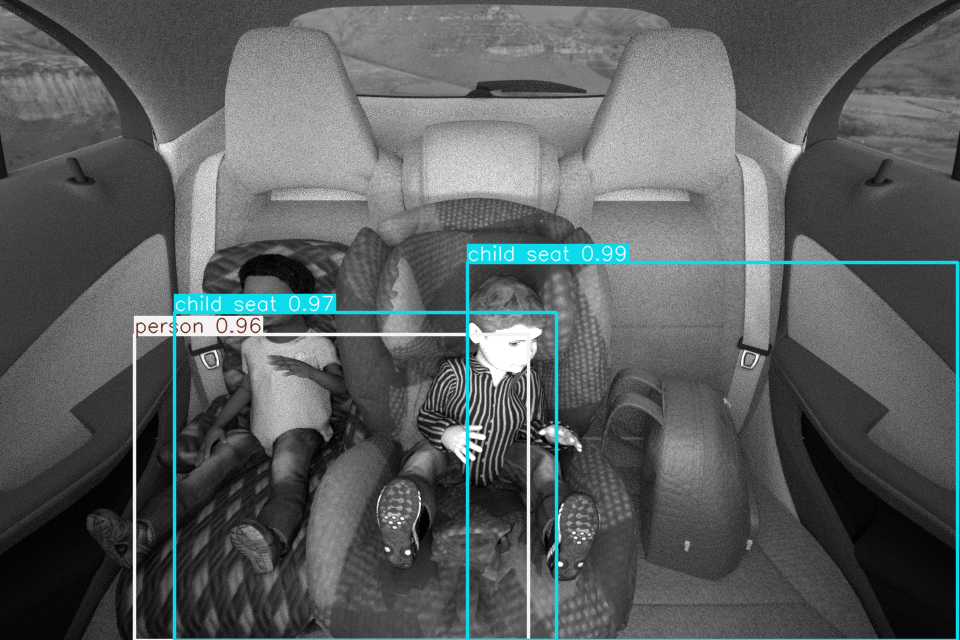

In [5]:
import os

image = os.path.join('dataset_yolo', 'images', 'train', 'grayscale_wholeImage', 'aclass_train_imageID_147_GT_2_2_4.png')

result = model(image)
result.print()

from PIL import Image
Image.fromarray(result.render()[0]).show()

# print(np.squeeze(result.render()))

# import matplotlib.pyplot as plt
# import numpy as np

# plt.imshow(np.squeeze(result.render()), cmap='gray')
# plt.show()

In [6]:
from pathlib import Path

rare_class_id = 4
label_dir = Path("../dataset/labels/train/boundingBoxes_wholeImage")
image_dir = Path("../dataset/images/train/grayscale_wholeImage")
output_list = []

for label_file in label_dir.glob("*.txt"):
    with open(label_file) as f:
        for line in f:
            if line.strip().startswith(str(rare_class_id)):
                output_list.append(label_file.stem)
                break

print(f"Found {len(output_list)} images containing class {rare_class_id}")


Found 656 images containing class 4
